<a href="https://colab.research.google.com/github/datdinhstore99/abc/blob/master/Copy_of_Chuviettayknc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#pip3 install tensorflow

In [0]:
link = "https://storage.googleapis.com/kaggle-data-sets/9726/17999/bundle/archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1590249980&Signature=KjnJ07tcDM80KQucEsZrHyZ2Ff8KtRFxA8GTLFuuwHLcNpS0xoUE9nBDfGXgEhSVwcPzk7gLCis4tOkBeM0zy5oDJrpd%2B3yCGC5T%2Bmnus1aisJZ0njAOxg0XCqGI1%2B7kepGuv3UgYO9bYUtwvMPhZeGDloM97BAMjrcjVAGYsLE265kqG7VmQVRe9AVpPuTNgk5iTpQrBq5O3c8qApnngBqkd724tAlCmwdS%2BnUGcr9FM3iS3Tyh%2FsmMUxLZiuA7X0a%2FZwwNDYdHJEZKvazjvGh3LeRVuwp17bMxqHayFx8UHXWF23xDcXVJCgbAL23yg%2BOgpelGHlzXRTpZvk%2B9Pg%3D%3D&response-content-disposition=attachment%3B+filename%3Daz-handwritten-alphabets-in-csv-format.zip"

In [5]:
!pip install wget



  Created wheel for wget: filename=wget-3.2-cp36-none-any.whl size=9682 sha256=4ddc7bcd88220fa0391f0bd03dd65ae1ad1cbfe9cd3be74f26d4ee7dc2f23d89
  Stored in directory: /root/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built wget


In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
import wget
wget.download(link)

'az-handwritten-alphabets-in-csv-format.zip'

In [0]:
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import normalize

In [0]:
data ="./" 
!unzip -q az-handwritten-alphabets-in-csv-format.zip -d $data

In [0]:
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import normalize

import csv

Đọc dữ liệu chữ cái viết tay

In [0]:
train_link = data + "A_Z Handwritten Data.csv"
import pickle
with open(train_link, mode="r") as csv_file:
    result = csv.reader(csv_file)
    rows = []
    
    # đọc từng dòng của file và thêm vào list rows, mỗi phần tử của list là một dòng
    for row in result:
        rows.append(row)

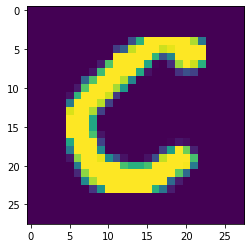

In [14]:
letter = rows[30000]
x = np.array([int(j) for j in letter[1:]])
x = x.reshape(28,28)
plt.imshow(x)

Đọc và gán nhãn các dữ liệu chữ cái a,b,c,d

In [0]:
train_data = []
train_label = []

for letter in rows :
  if letter[0] == '0' or (letter[0] == '1') or (letter[0] == '2') or (letter[0] == '3'):
      x = np.array([int(j) for j in letter[1:]])
      train_data.append(x)
      train_label.append(int(letter[0]))
  else:
      break

Đảo thứ tự dữ liệu nhập vào

In [0]:
import random

shuffle_order = list(range(56081))
random.shuffle(shuffle_order)

train_data = np.array(train_data)
train_label = np.array(train_label)

train_data = train_data[shuffle_order]
train_label = train_label[shuffle_order]

In [0]:
# This function visualizes filters in matrix A. Each column of A is a
# filter. We will reshape each column into a square image and visualizes
# on each cell of the visualization panel.
# All other parameters are optional, usually you do not need to worry
# about it.
# opt_normalize: whether we need to normalize the filter so that all of
# them can have similar contrast. Default value is true.
# opt_graycolor: whether we use gray as the heat map. Default is true.
# opt_colmajor: you can switch convention to row major for A. In that
# case, each row of A is a filter. Default value is false.
# source: https://github.com/tsaith/ufldl_tutorial

def display_network(A, m = -1, n = -1):
    opt_normalize = True
    opt_graycolor = True

    # Rescale
    A = A - np.average(A)

    # Compute rows & cols
    (row, col) = A.shape
    sz = int(np.ceil(np.sqrt(row)))
    buf = 1
    if m < 0 or n < 0:
        n = np.ceil(np.sqrt(col))
        m = np.ceil(col / n)
        

    image = np.ones(shape=(buf + m * (sz + buf), buf + n * (sz + buf)))

    if not opt_graycolor:
        image *= 0.1

    k = 0

    for i in range(int(m)):
        for j in range(int(n)):
            if k >= col:
                continue

            clim = np.max(np.abs(A[:, k]))

            if opt_normalize:
                image[buf + i * (sz + buf):buf + i * (sz + buf) + sz, buf + j * (sz + buf):buf + j * (sz + buf) + sz] = \
                    A[:, k].reshape(sz, sz) / clim
            else:
                image[buf + i * (sz + buf):buf + i * (sz + buf) + sz, buf + j * (sz + buf):buf + j * (sz + buf) + sz] = \
                    A[:, k].reshape(sz, sz) / np.max(np.abs(A))
            k += 1

    return image

def display_color_network(A):
    """
    # display receptive field(s) or basis vector(s) for image patches
    #
    # A         the basis, with patches as column vectors
    # In case the midpoint is not set at 0, we shift it dynamically
    :param A:
    :param file:
    :return:
    """
    if np.min(A) >= 0:
        A = A - np.mean(A)

    cols = np.round(np.sqrt(A.shape[1]))

    channel_size = A.shape[0] / 3
    dim = np.sqrt(channel_size)
    dimp = dim + 1
    rows = np.ceil(A.shape[1] / cols)

    B = A[0:channel_size, :]
    C = A[channel_size:2 * channel_size, :]
    D = A[2 * channel_size:3 * channel_size, :]

    B = B / np.max(np.abs(B))
    C = C / np.max(np.abs(C))
    D = D / np.max(np.abs(D))

    # Initialization of the image
    image = np.ones(shape=(dim * rows + rows - 1, dim * cols + cols - 1, 3))

    for i in range(int(rows)):
        for j in range(int(cols)):
            # This sets the patch
            image[i * dimp:i * dimp + dim, j * dimp:j * dimp + dim, 0] = B[:, i * cols + j].reshape(dim, dim)
            image[i * dimp:i * dimp + dim, j * dimp:j * dimp + dim, 1] = C[:, i * cols + j].reshape(dim, dim)
            image[i * dimp:i * dimp + dim, j * dimp:j * dimp + dim, 2] = D[:, i * cols + j].reshape(dim, dim)

    image = (image + 1) / 2

    #PIL.Image.fromarray(np.uint8(image * 255), 'RGB').save(filename)

    return image

In [0]:
X = train_data
X0 = np.asarray(X)[:1000,:]/256.0
X = X0

K = 4
kmeans = KMeans(n_clusters=K).fit(X)

pred_label = kmeans.predict(X)

<class 'numpy.ndarray'>
(784, 4)


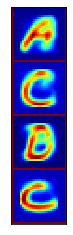

In [23]:
print(type(kmeans.cluster_centers_.T))
print(kmeans.cluster_centers_.T.shape)
A = display_network(kmeans.cluster_centers_.T, K, 1)

f1 = plt.imshow(A, interpolation='nearest', cmap = "jet")
f1.axes.get_xaxis().set_visible(False)
f1.axes.get_yaxis().set_visible(False)
plt.show()
# plt.savefig('a1.png', bbox_inches='tight')


# a colormap and a normalization instance
cmap = plt.cm.jet
norm = plt.Normalize(vmin=A.min(), vmax=A.max())

# map the normalized data to colors
# image is now RGBA (512x512x4) 
image = cmap(norm(A))

import imageio
imageio.imwrite('aa.png', image)

In [20]:
print(type(pred_label))
print(pred_label.shape)
print(type(X0))

<class 'numpy.ndarray'>
(1000,)
<class 'numpy.ndarray'>


In [0]:
N0 = 20;
X1 = np.zeros((N0*K, 784))
X2 = np.zeros((N0*K, 784))

for k in range(K):
    Xk = X0[pred_label == k, :]

    center_k = [kmeans.cluster_centers_[k]]
    neigh = NearestNeighbors(N0).fit(Xk)
    dist, nearest_id  = neigh.kneighbors(center_k, N0)
    
    X1[N0*k: N0*k + N0,:] = Xk[nearest_id, :]
    X2[N0*k: N0*k + N0,:] = Xk[:N0, :]

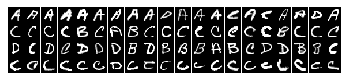

In [22]:
plt.axis('off')
A = display_network(X2.T, K, N0)
f2 = plt.imshow(A, interpolation='nearest' )
plt.gray()
plt.show()

Xậy dựng hàm K-means clustering

In [0]:
def display_digit(digit, labeled = True, title = ""):
    """ 
    graphically displays a 784x1 vector, representing a digit
    """
    if labeled:
        digit = digit[1]
    image = digit
    plt.figure()
    fig = plt.imshow(image.reshape(28,28))
    fig.set_cmap('gray_r')
    fig.axes.get_xaxis().set_visible(False)
    fig.axes.get_yaxis().set_visible(False)
    if title != "":
        plt.title("Inferred label: " + str(title))

In [0]:
#thuat toan 
#khoi tao cac centers ban dau
def init_centroids(labelled_data,k):
  # randomly pick some k centers from the data as starting values for centroids
  return map(lambda x: x[1],random.sample(labelled_data,k))

def sum_cluster(labelled_cluster):
  # assumes len(cluster)>0
  sum_ = labelled_cluster[0][1].copy()
  for (label,vector) in labelled_cluster[1:]:
    sum_ += vector
  return sum_

def mean_cluster(labelled_cluster):
  #lay gia tri trung binh cua mot danh sach cac vector,lay tong va sau do chia cho kich thuoc cua cum
  sum_of_points = sum_cluster(labelled_cluster)
  mean_of_points = sum_of_points * (1.0 / len(labelled_cluster))
  return mean_of_points

In [0]:
def form_clusters(labelled_data, unlabelled_centroids):
    """
    given some data and centroids for the data, allocate each datapoint
    to its closest centroid. This forms clusters.
    """
    # enumerate because centroids are arrays which are unhashable,
    centroids_indices = range(len(unlabelled_centroids))
    
    # initialize an empty list for each centroid. The list will contain
    # all the datapoints that are closer to that centroid than to any other.
    # That list is the cluster of that centroid.
    clusters = {c: [] for c in centroids_indices}
    
    for (label,Xi) in labelled_data:
        # for each datapoint, pick the closest centroid.
        smallest_distance = float("inf")
        for cj_index in centroids_indices:
            cj = unlabelled_centroids[cj_index]
            distance = np.linalg.norm(Xi - cj)
            if distance < smallest_distance:
                closest_centroid_index = cj_index
                smallest_distance = distance
        # allocate that datapoint to the cluster of that centroid.
        clusters[closest_centroid_index].append((label,Xi))
    return clusters.values()

def move_centroids(labelled_clusters):
    """
    returns a list of centroids corresponding to the clusters.
    """
    new_centroids = []
    for cluster in labelled_clusters:
        new_centroids.append(mean_cluster(cluster))
    return new_centroids

def repeat_until_convergence(labelled_data, labelled_clusters, unlabelled_centroids):
    """
    form clusters around centroids, then keep moving the centroids
    until the moves are no longer significant, i.e. we've found
    the best-fitting centroids for the data.
    """
    previous_max_difference = 0
    while True:
        unlabelled_old_centroids = unlabelled_centroids
        unlabelled_centroids = move_centroids(labelled_clusters)
        labelled_clusters = form_clusters(labelled_data, unlabelled_centroids)
        # we keep old_clusters and clusters so we can get the maximum difference
        # between centroid positions every time. we say the centroids have converged
        # when the maximum difference between centroid positions is small.   
        differences = map(lambda a, b: np.linalg.norm(a-b),unlabelled_old_centroids,unlabelled_centroids)
        max_difference = max(differences)
        difference_change = abs((max_difference-previous_max_difference)/np.mean([previous_max_difference,max_difference])) * 100
        previous_max_difference = max_difference
        # difference change is nan once the list of differences is all zeroes.
        if np.isnan(difference_change):
            break
    return labelled_clusters, unlabelled_centroids

In [0]:
def cluster(labelled_data, k):

  centroids = init_centroids(labelled_data, k)
  clusters = form_clusters(labelled_data,centroids)
  final_clusters, final_centroids = repeat_until_convergence(labelled_data,clusters,centroids)
  return final_clusters,final_centroids

In [0]:
def assign_labels_to_centroids(clusters, centroids):
    """
    Assigns a digit label to each cluster.
    Cluster is a list of clusters containing labelled datapoints.
    NOTE: this function depends on clusters and centroids being in the same order.
    """
    labelled_centroids = []
    for i in range(len(clusters)):
        labels = map(lambda x: x[0], clusters[i])
        # pick the most common label
        most_common = max(set(labels), key=labels.count)
        centroid = (most_common, centroids[i])
        labelled_centroids.append(centroid)
    return labelled_centroids

In [0]:
def classify_digit(digit, labelled_centroids):
    """
    given an unlabelled digit represented by a vector and a list of
    labelled centroids [(label,vector)], determine the closest centroid
    and thus classify the digit.
    """
    mindistance = float("inf")
    for (label, centroid) in labelled_centroids:
        distance = np.linalg.norm(centroid - digit)
        if distance < mindistance:
            mindistance = distance
            closest_centroid_label = label
    return closest_centroid_label

def get_error_rate(digits,labelled_centroids):
    """
    classifies a list of labelled digits. returns the error rate.
    """
    classified_incorrect = 0
    for (label,digit) in digits:
        classified_label = classify_digit(digit, labelled_centroids)
        if classified_label != label:
            classified_incorrect +=1
    error_rate = classified_incorrect / float(len(digits))
    return error_rate

In [0]:
error_rates = {x:None for x in range(5,25)+[100]}
for k in range(5,25):
  trained_clusters, trained_centroids = cluster(train_data,k)
  labelled_centroids = assign_labels_to_centroids(trained_clusters, trained_centroids)
  error_rate = get_error_rate(validation,labelled_centroids)
  error_rate[k] = error_rate

#show the error rates
x_axis = sorted(error_rates.keys())
y_axis = [error_rates[key] for key in x_axis]
plt.figure()
plt.title("Error Rate by Number of Clusters")
plt.scatter(x_axis,y_axis)
plt.xlabel("Number of clusters")
plt.ylabel("Error Rate")
plt.show()
